# HavocMapper Visualization Guide
## Sections by multiple collaborators
---

### Imports and bringing in cleaned CSV file

In [134]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [135]:
# Bring in refined CSV file
fema_disasters = pd.read_csv('Assets/CSVs/femaDisasters_clean.csv')

# Bring in summary CSV File
disasters_summary = pd.read_csv('Assets/CSVs/disasters_summary.csv')

# Claudia's Section:

In [136]:
# Sample top of data
fema_disasters.head()

,disasterNumber,declarationRequestNumber,declarationTitle,area,areaType,state,incidentType,declarationType,declarationDate,incidentBeginDate,tribalRequest,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,latitude,longitude
0,5530,24123,GOLD RANCH FIRE,Washoe,County,NV,Fire,FM,2024-08-12,2024-08-11,0,0,0,1,1,40.584905,-119.613161
1,5529,24122,LEE FALLS FIRE,Washington,County,OR,Fire,FM,2024-08-09,2024-08-08,0,0,0,1,1,45.560188,-123.058791
2,5528,24116,ELK LANE FIRE,Jefferson,County,OR,Fire,FM,2024-08-06,2024-08-04,0,0,0,1,1,44.722434,-123.007389
3,5527,24111,MILE MARKER 132 FIRE,Deschutes,County,OR,Fire,FM,2024-08-02,2024-08-02,0,0,0,1,1,44.156923,-121.258700
4,5522,24102,BOREL FIRE,Kern,County,CA,Fire,FM,2024-07-27,2024-07-25,0,0,0,1,1,35.314570,-118.753822


In [137]:
# Convert dates to datetime
fema_disasters['declarationDate'] = pd.to_datetime(fema_disasters['declarationDate'])
fema_disasters['incidentBeginDate'] = pd.to_datetime(fema_disasters['incidentBeginDate'])

# Calculate time to declare
fema_disasters['time_to_declare'] = (fema_disasters['declarationDate'] - fema_disasters['incidentBeginDate']).dt.days

# # Summary statistics for time_to_declare
fema_disasters['time_to_declare'].describe()

count    58163.000000
mean        20.624641
std         28.488696
min       -266.000000
25%          1.000000
50%          8.000000
75%         31.000000
max        730.000000
Name: time_to_declare, dtype: float64

In [138]:
program_cols = ['ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared']
fema_disasters[program_cols].sum()

ihProgramDeclared     7197
iaProgramDeclared    16816
paProgramDeclared    54033
hmProgramDeclared    25377
dtype: int64

In [139]:
fema_disasters['total_programs'] = fema_disasters[program_cols].sum(axis = 1)

In [140]:
#correlation matrix
program_cols = ['ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared']
program_cols

['ihProgramDeclared',
 'iaProgramDeclared',
 'paProgramDeclared',
 'hmProgramDeclared']

In [141]:
#corelation matrix
fema_disasters[program_cols].corr()

,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared
ihProgramDeclared,1.000000,0.154586,-0.178891,0.419233
iaProgramDeclared,0.154586,1.000000,-0.303430,-0.197370
paProgramDeclared,-0.178891,-0.303430,1.000000,-0.043066
hmProgramDeclared,0.419233,-0.197370,-0.043066,1.000000


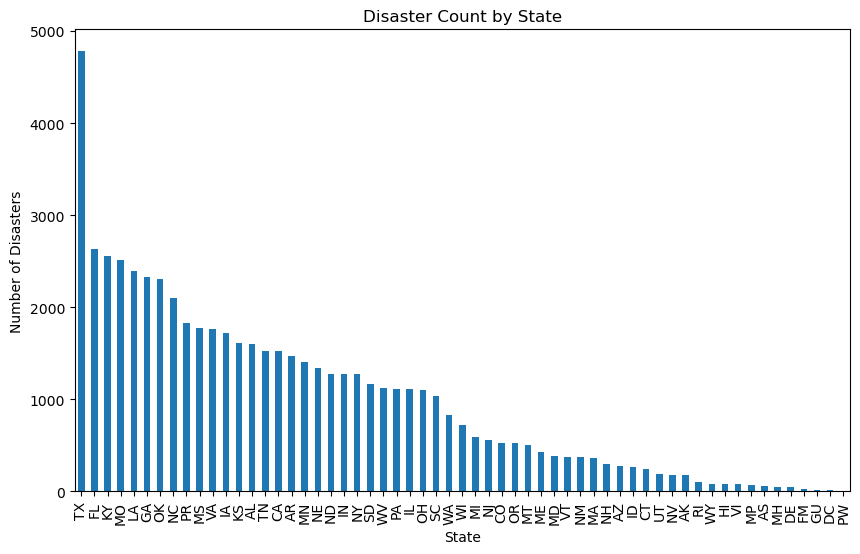

In [142]:
state_disaster_count = fema_disasters['state'].value_counts()

# Plot
state_disaster_count.plot(kind='bar', figsize=(10, 6), title="Disaster Count by State")
plt.xlabel("State")
plt.ylabel("Number of Disasters")
plt.show()

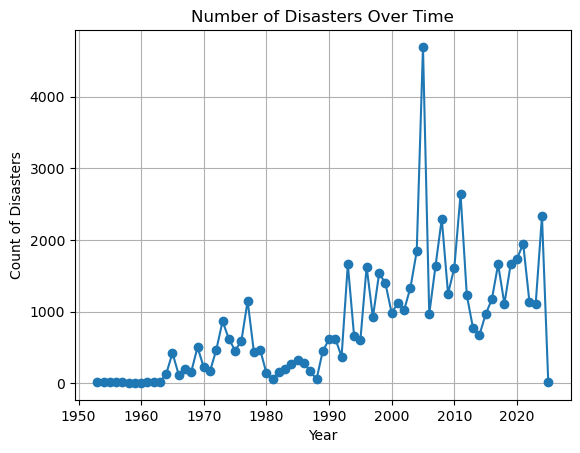

In [143]:
# Extract year from declarationDate
fema_disasters['declarationYear'] = fema_disasters['declarationDate'].dt.year

# Count disasters by year
yearly_disasters = fema_disasters['declarationYear'].value_counts().sort_index()

# Plot trends over time
plt.plot(yearly_disasters.index, yearly_disasters.values, marker='o')
plt.title("Number of Disasters Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Disasters")
plt.grid()
plt.show()


In [144]:
# Filter disasters between 2000 and 2010
fema_disasters['declarationDate'] = pd.to_datetime(fema_disasters['declarationDate'])
disasters_2000_2010 = fema_disasters[
    (fema_disasters['declarationDate'] >= '2000-01-01') & (fema_disasters['declarationDate'] <= '2010-12-31')
]

# Display the filtered dataset
disasters_2000_2010[['incidentType', 'state', 'declarationDate']]


,incidentType,state,declarationDate
940,Fire,PR,2009-10-24
941,Fire,PR,2009-10-24
942,Fire,PR,2009-10-24
943,Fire,PR,2009-10-24
944,Fire,PR,2009-10-24
...,...,...,...
56648,Freezing,FL,2001-02-05
56649,Freezing,FL,2001-02-05
56650,Freezing,FL,2001-02-05
56651,Freezing,FL,2001-02-05


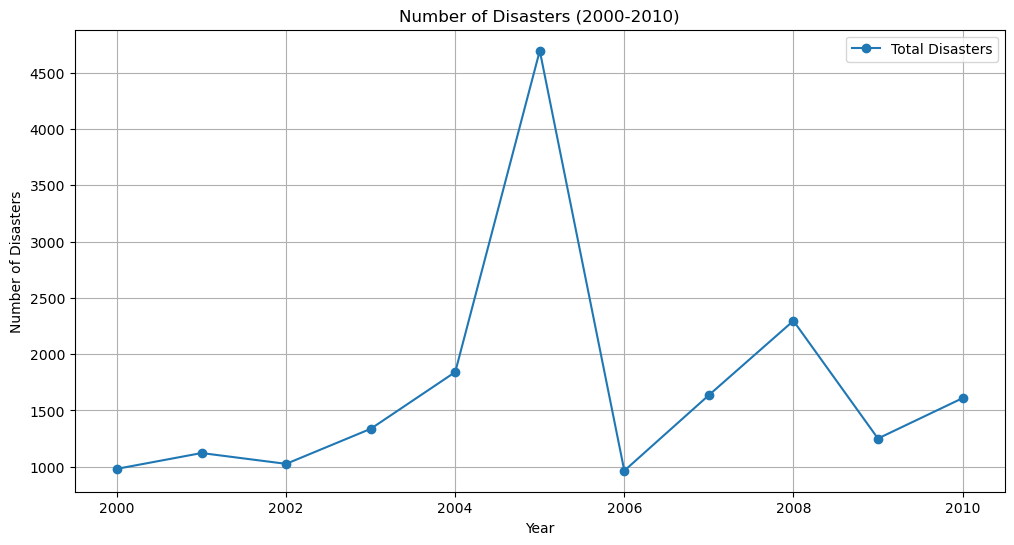

In [145]:
# Extract year from declarationDate
disasters_2000_2010['year'] = disasters_2000_2010['declarationDate'].dt.year

# Count disasters by year
yearly_disasters = disasters_2000_2010['year'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(yearly_disasters.index, yearly_disasters.values, marker='o', linestyle='-', label="Total Disasters")
plt.title("Number of Disasters (2000-2010)")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.grid()
plt.legend()
plt.show()

In [146]:
# Filter disasters for 2005
disasters_2005 = fema_disasters[fema_disasters['declarationDate'].dt.year == 2005]

# Display the dataset for 2005
disasters_2005[['incidentType', 'state', 'declarationDate']]

,incidentType,state,declarationDate
2115,Fire,OK,2005-12-29
2116,Fire,OK,2005-12-28
2117,Fire,TX,2005-12-28
2118,Fire,OK,2005-12-28
2119,Fire,TX,2005-12-28
...,...,...,...
56476,Typhoon,AS,2005-02-18
56477,Typhoon,AS,2005-02-18
56478,Typhoon,AS,2005-02-18
56479,Typhoon,AS,2005-02-18


In [147]:
# Count disasters by state
state_count_2005 = disasters_2005['state'].value_counts()

# Display results
print(state_count_2005)


state
TX    765
LA    260
IN    231
OH    176
GA    159
KY    152
KS    151
NC    147
AL    141
MS    135
FL    122
IL    118
MO    114
NE    104
ND    103
SD    102
IA     99
TN     95
VA     95
MN     87
OK     84
NY     83
MI     83
CA     82
PA     78
AR     75
WI     73
CO     66
WV     61
MT     56
ME     55
NV     53
SC     46
ID     45
AZ     43
UT     43
WA     42
MA     40
OR     37
NH     35
NM     35
NJ     30
MD     23
CT     21
PR     17
RI     10
HI      5
AS      5
AK      4
DE      3
MP      3
DC      1
WY      1
Name: count, dtype: int64


In [148]:
# Extract the month from the declaration date
disasters_2005['month'] = disasters_2005['declarationDate'].dt.month

# Count disasters by month
monthly_disasters_2005 = disasters_2005['month'].value_counts().sort_index()

# Display results
monthly_disasters_2005


month
1      163
2      234
3       32
4       80
5        1
6       31
7      156
8      289
9     3564
10      39
11      63
12      42
Name: count, dtype: int64

Above we see that in the year 2005 september there was the highest spike of natural disasters

In [149]:
# Filter for a specific incident type (e.g., "Hurricane")
hurricane_2005 = disasters_2005[disasters_2005['incidentType'] == 'Hurricane']

# Display hurricane data for 2005
hurricane_2005[['state', 'declarationDate']]


,state,declarationDate
35500,FL,2005-10-24
35501,FL,2005-10-24
35502,FL,2005-10-24
35503,FL,2005-10-24
35504,FL,2005-10-24
...,...,...
44383,AL,2005-07-10
44384,AL,2005-07-10
44385,AL,2005-07-10
44386,AL,2005-07-10


In [150]:
# Group data by year and count the number of disasters
yearly_disasters = fema_disasters['declarationYear'].value_counts().sort_index()

# Calculate percentage change year-over-year
yearly_disasters_percentage_change = yearly_disasters.pct_change() * 100  # Convert to percentage

# Combine the counts and percentage change into a single DataFrame for better visualization
yearly_disasters_summary = pd.DataFrame({
    'Disaster Count': yearly_disasters,
    'Percentage Change (%)': yearly_disasters_percentage_change
})

# Display the summary
yearly_disasters_summary


,Disaster Count,Percentage Change (%)
declarationYear,,
1953,12,NaN
1954,14,16.666667
1955,15,7.142857
1956,14,-6.666667
1957,15,7.142857
...,...,...
2021,1947,12.154378
2022,1134,-41.756549
2023,1111,-2.028219


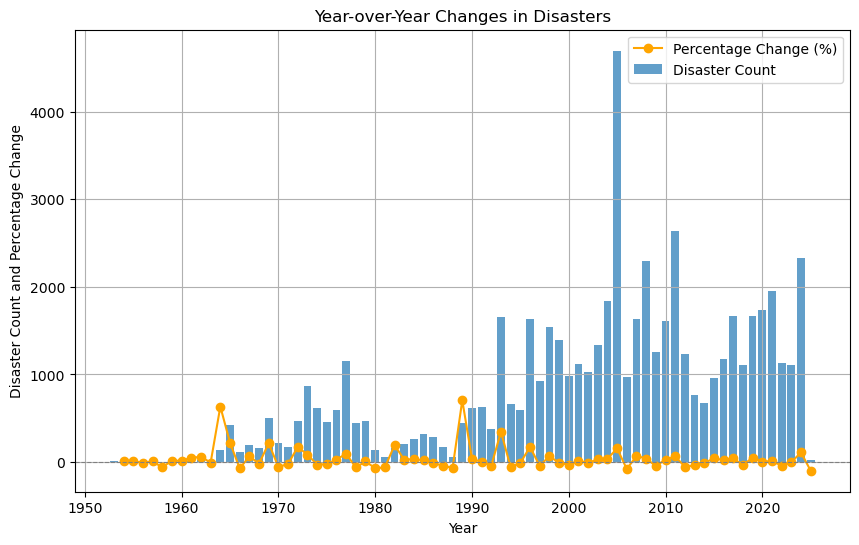

In [151]:
plt.figure(figsize=(10, 6))
plt.bar(yearly_disasters.index, yearly_disasters.values, alpha=0.7, label="Disaster Count")
plt.plot(yearly_disasters.index, yearly_disasters_percentage_change, marker='o', color='orange', label="Percentage Change (%)")
plt.title("Year-over-Year Changes in Disasters")
plt.xlabel("Year")
plt.ylabel("Disaster Count and Percentage Change")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()
plt.show()

In [152]:
# Find the year with the largest percentage change
max_change_year = yearly_disasters_summary['Percentage Change (%)'].idxmax()
max_change_value = yearly_disasters_summary['Percentage Change (%)'].max()

# Calculate the average percentage change (excluding the first NaN value)
average_change = yearly_disasters_summary['Percentage Change (%)'].mean()

# Print results
print(f"Year with the largest percentage change: {max_change_year} ({max_change_value:.2f}%)")
print(f"Average percentage change: {average_change:.2f}%")

Year with the largest percentage change: 1989 (705.36%)
Average percentage change: 38.90%


Above we can see that Natural Disasters declared by FEMA over time has significantly increased

In [153]:
time_by_state = fema_disasters.groupby('state')['time_to_declare'].mean().sort_values()
time_by_state

state
PR     7.795640
FL     8.321442
NC     9.128986
LA     9.155129
GA     9.451350
AS     9.901639
AL     9.950717
VI    10.708861
MP    10.865672
SC    11.225217
GU    11.578947
TX    14.653065
MS    15.326393
WV    15.535049
PA    15.555456
CO    15.920904
NJ    16.088129
MI    16.563025
HI    16.847059
VA    17.284904
AR    17.956522
PW    18.000000
NV    18.114130
CA    18.368525
OK    20.227766
OH    20.329091
TN    20.329197
OR    20.907547
WI    21.689655
DE    21.936170
AZ    22.032727
MD    22.752632
NM    22.813830
MO    23.390438
MA    25.427397
KY    25.442835
RI    25.518868
CT    25.534694
IL    26.342651
WY    26.523256
IN    26.847537
IA    26.973193
NY    28.535377
NH    28.973333
ID    29.580153
MN    30.402135
VT    30.885942
FM    32.600000
NE    33.372006
ME    33.612676
UT    34.155440
DC    35.277778
WA    35.772672
KS    38.422886
MT    42.922925
MH    44.220000
ND    45.681250
SD    49.800684
AK    52.393443
Name: time_to_declare, dtype: float64

In [154]:
time_by_incident = fema_disasters.groupby('incidentType')['time_to_declare'].mean().sort_values()
time_by_incident

incidentType
Drought                 2.789311
Hurricane               7.511029
Coastal Storm           9.048666
Tornado                 9.358421
Tropical Storm         10.517408
Typhoon                13.984375
Fire                   15.325873
Severe Ice Storm       17.103131
Flood                  25.022622
Snowstorm              25.104027
Tsunami                26.666667
Straight-Line Winds    30.000000
Severe Storm           31.016561
Freezing               42.586207
Winter Storm           70.370690
Name: time_to_declare, dtype: float64

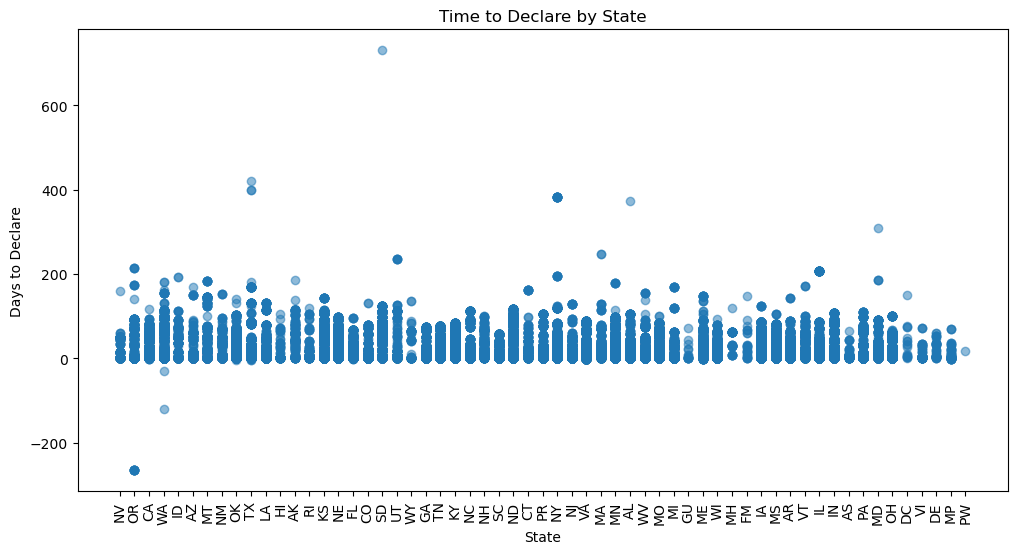

In [155]:
plt.figure(figsize=(12, 6))
plt.scatter(fema_disasters['state'], fema_disasters['time_to_declare'], alpha=0.5)
plt.title("Time to Declare by State")
plt.xlabel("State")
plt.ylabel("Days to Declare")
plt.xticks(rotation=90)
plt.show()

In [156]:
fema_disasters['cycle_time'] = fema_disasters['declarationDate'] - fema_disasters['incidentBeginDate']
fema_disasters['cycle_time'] = fema_disasters['cycle_time'].dt.days
cycle_time_by_state = fema_disasters.groupby('state')['cycle_time'].mean().sort_values()
cycle_time_by_state

state
PR     7.795640
FL     8.321442
NC     9.128986
LA     9.155129
GA     9.451350
AS     9.901639
AL     9.950717
VI    10.708861
MP    10.865672
SC    11.225217
GU    11.578947
TX    14.653065
MS    15.326393
WV    15.535049
PA    15.555456
CO    15.920904
NJ    16.088129
MI    16.563025
HI    16.847059
VA    17.284904
AR    17.956522
PW    18.000000
NV    18.114130
CA    18.368525
OK    20.227766
OH    20.329091
TN    20.329197
OR    20.907547
WI    21.689655
DE    21.936170
AZ    22.032727
MD    22.752632
NM    22.813830
MO    23.390438
MA    25.427397
KY    25.442835
RI    25.518868
CT    25.534694
IL    26.342651
WY    26.523256
IN    26.847537
IA    26.973193
NY    28.535377
NH    28.973333
ID    29.580153
MN    30.402135
VT    30.885942
FM    32.600000
NE    33.372006
ME    33.612676
UT    34.155440
DC    35.277778
WA    35.772672
KS    38.422886
MT    42.922925
MH    44.220000
ND    45.681250
SD    49.800684
AK    52.393443
Name: cycle_time, dtype: float64

In [157]:
# Summary statistics for cycle time by incident type
incident_type_analysis = fema_disasters.groupby('incidentType')['cycle_time'].describe()

# Display the result
print(incident_type_analysis)

                       count       mean        std    min   25%   50%   75%  \
incidentType                                                                  
Coastal Storm          637.0   9.048666  15.432012    0.0   2.0   6.0   9.0   
Drought               1291.0   2.789311  10.545534    0.0   0.0   0.0   0.0   
Fire                  3753.0  15.325873  30.666271 -120.0   0.0   1.0  27.0   
Flood                11007.0  25.022622  34.576148    0.0   0.0  10.0  40.0   
Freezing               290.0  42.586207  41.389129    0.0   0.0  51.0  66.0   
Hurricane            13465.0   7.511029  14.136012   -2.0   1.0   3.0   8.0   
Severe Ice Storm      2938.0  17.103131  21.047507    0.0   3.0   8.0  25.0   
Severe Storm         18296.0  31.016561  28.273745 -266.0   8.0  24.0  48.0   
Snowstorm             3576.0  25.104027  33.699840    0.0   3.0  12.0  40.0   
Straight-Line Winds      2.0  30.000000   0.000000   30.0  30.0  30.0  30.0   
Tornado               1621.0   9.358421  16.358687  

In [158]:
# Average cycle time by incident type
average_cycle_time = fema_disasters.groupby('incidentType')['cycle_time'].mean().sort_values()

# Display the result
print(average_cycle_time)

incidentType
Drought                 2.789311
Hurricane               7.511029
Coastal Storm           9.048666
Tornado                 9.358421
Tropical Storm         10.517408
Typhoon                13.984375
Fire                   15.325873
Severe Ice Storm       17.103131
Flood                  25.022622
Snowstorm              25.104027
Tsunami                26.666667
Straight-Line Winds    30.000000
Severe Storm           31.016561
Freezing               42.586207
Winter Storm           70.370690
Name: cycle_time, dtype: float64


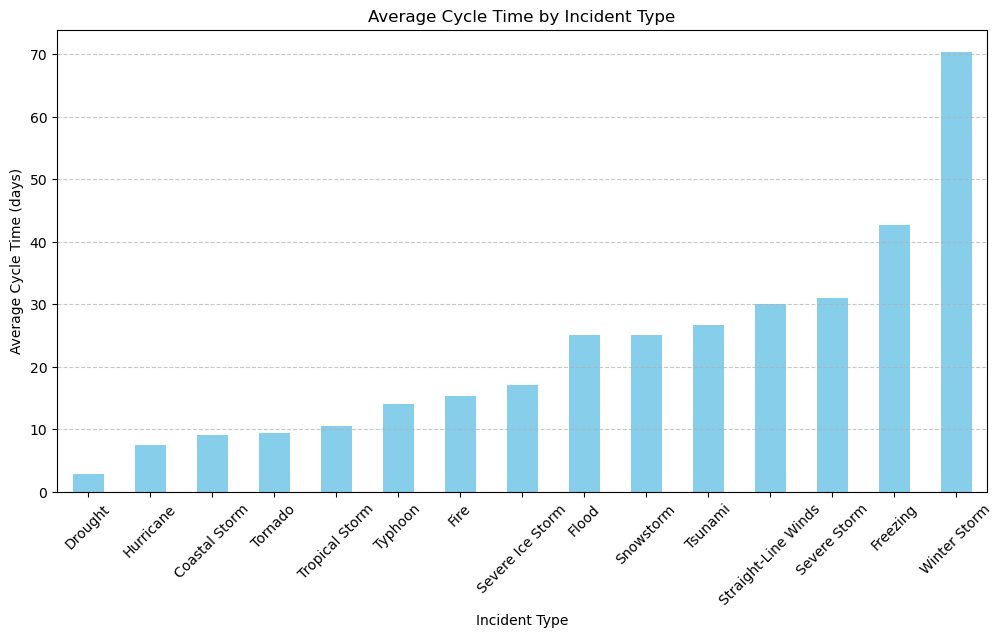

In [159]:
# Plot average cycle time
plt.figure(figsize=(12, 6))
average_cycle_time.plot(kind='bar', color='skyblue')
plt.title('Average Cycle Time by Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Average Cycle Time (days)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

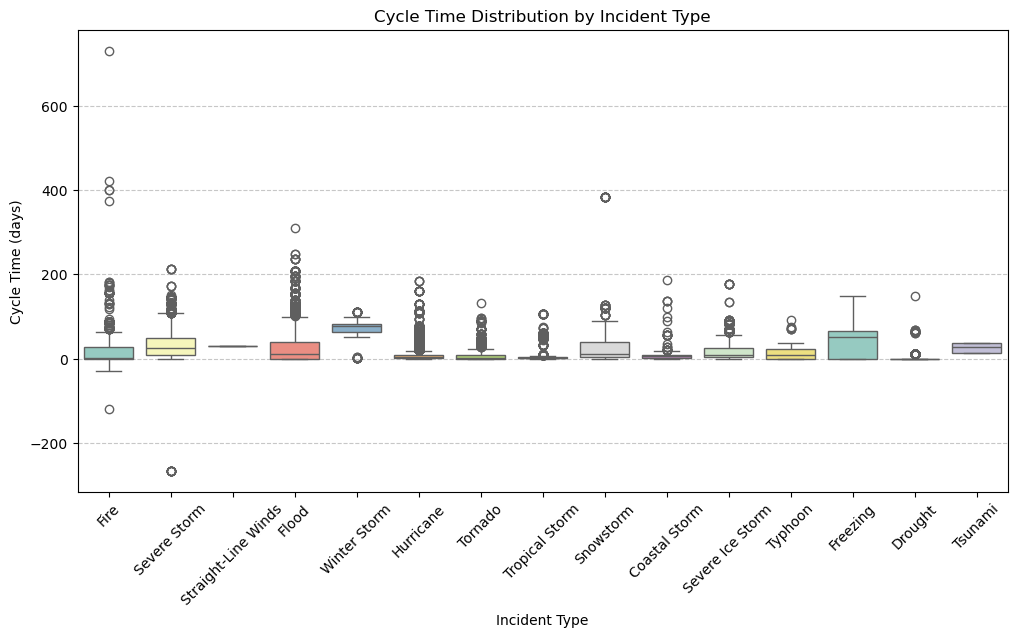

In [160]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='incidentType', y='cycle_time', data=fema_disasters, palette='Set3')
plt.title('Cycle Time Distribution by Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Cycle Time (days)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [161]:
# Sort the data by declarationDate
fema_disasters_sorted = fema_disasters.sort_values(by='declarationDate')

# Display the sorted dataset
fema_disasters_sorted[['incidentType', 'state', 'declarationDate']]

,incidentType,state,declarationDate
48259,Tornado,GA,1953-05-02
48258,Tornado,TX,1953-05-15
26178,Flood,LA,1953-05-29
47187,Tornado,MI,1953-06-02
26063,Flood,MT,1953-06-06
...,...,...,...
9330,Severe Storm,MO,2025-01-01
2491,Fire,OR,2025-01-01
3056,Fire,CA,2025-01-07
3054,Fire,CA,2025-01-08


In [162]:
# Filter by a specific incident type
specific_incident = fema_disasters_sorted[fema_disasters_sorted['incidentType'] == 'Fire']

# Display states and dates for the specific incident type
print(specific_incident[['state', 'declarationDate']])

     state declarationDate
3752    NH      1953-07-02
3751    CA      1956-12-29
3750    ID      1960-07-22
3749    CA      1961-11-16
3747    ID      1967-08-30
...    ...             ...
2494    OR      2025-01-01
2491    OR      2025-01-01
3056    CA      2025-01-07
3054    CA      2025-01-08
3055    CA      2025-01-08

[3753 rows x 2 columns]


In [163]:
# Count disasters by state
state_disaster_count = fema_disasters['state'].value_counts()

# Display the state with the most disasters
most_disaster_state = state_disaster_count.idxmax()
most_disaster_count = state_disaster_count.max()
print(f"The state with the most disasters is {most_disaster_state} with {most_disaster_count} disasters.")

The state with the most disasters is TX with 4779 disasters.


In [164]:
# Filter the dataset for the state with the most disasters
state_with_most_disasters = fema_disasters[fema_disasters['state'] == most_disaster_state]

# Count incident types in that state
incident_type_count = state_with_most_disasters['incidentType'].value_counts()

# Display the most common incident type
most_common_incident = incident_type_count.idxmax()
most_common_count = incident_type_count.max()
print(f"The most common incident type in {most_disaster_state} is {most_common_incident} with {most_common_count} occurrences.")

The most common incident type in TX is Hurricane with 1370 occurrences.


In [165]:
# Group by state and incident type, then count
state_incident_summary = fema_disasters.groupby(['state', 'incidentType']).size().unstack(fill_value=0)

# Find the most common incident type for each state
most_common_by_state = state_incident_summary.idxmax(axis=1)
most_common_count_by_state = state_incident_summary.max(axis=1)

# Combine results into a DataFrame
state_summary = pd.DataFrame({
    'Most Common Incident Type': most_common_by_state,
    'Count of Most Common Type': most_common_count_by_state,
    'Total Disasters': state_disaster_count
}).reset_index().rename(columns={'index': 'State'})

# Display the full summary
print(state_summary)

   state Most Common Incident Type  Count of Most Common Type  Total Disasters
0     AK              Severe Storm                         72              183
1     AL                 Hurricane                        678             1603
2     AR              Severe Storm                        651             1472
3     AS                 Hurricane                         25               61
4     AZ                      Fire                         95              275
5     CA                      Fire                        476             1525
6     CO                     Flood                        160              531
7     CT                 Hurricane                         96              245
8     DC              Severe Storm                          9               18
9     DE                 Hurricane                         22               47
10    FL                 Hurricane                       1432             2635
11    FM                   Typhoon                  